In [13]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib.font_manager as font_manager

In [14]:
def calcCoers(df1):
    dfx = df1.iloc[100:298]
    dfx1 = dfx[dfx['y']>=0]
    min1 = dfx1['y'].min()
    dfx = df1.iloc[299:498]
    dfx2 = dfx[dfx['y']<0]
    min2 = dfx2['y'].max()
    hx1 = dfx1.loc[dfx1['y'] == min1]
    hx1V = hx1.iloc[0,0]
    hx2 = dfx2.loc[dfx2['y'] == min2]
    hx2V = hx2.iloc[0,0]
    hCoers = 0.5*(abs(hx1V)+abs(hx2V))
    return hCoers

In [15]:
# ======== GENERATING DF FOR HC VS TEMP PLOT ========

for theta in range(30,181,30):
    frameName = "df" + str(theta)
    dfx = pd.DataFrame(columns=['x','y'])
    j = 1
    
    temp = 20
    while temp < 301:
        filename = "theta" + str(theta) + "/temp" + str(temp)
        with open(filename) as file:
            mh = np.asarray([[float(num) for num in line.split('\t')] for line in file])
            df = pd.DataFrame(data=mh[0:,0:],columns=['x','y'])
            dfx.loc[j-1] = temp, calcCoers(df)
            j=j+1
            if temp < 100:
                temp = temp + 20
            else:
                temp = temp + 50
    globals()[frameName] = dfx
print(j)
print(df30)

10
       x      y
0   20.0  0.290
1   40.0  0.270
2   60.0  0.250
3   80.0  0.230
4  100.0  0.210
5  150.0  0.160
6  200.0  0.110
7  250.0  0.065
8  300.0  0.025


In [16]:
# ======== GENERATING DF FOR HISTERESYS PLOT ========

temp = 20
while temp < 101:
    filename = "theta" + str(30) + "/temp" + str(temp)
    frameName = "dfH" + str(temp)
    with open(filename) as file:
        mh = np.asarray([[float(num) for num in line.split('\t')] for line in file])
        df = pd.DataFrame(data=mh[0:,0:],columns=['x','y'])
        temp = temp + 20
    globals()[frameName] = df

/home/vizi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  del sys.path[0]
/home/vizi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  
/home/vizi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  from ipykernel import kernelapp as app
/home/vizi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in dat

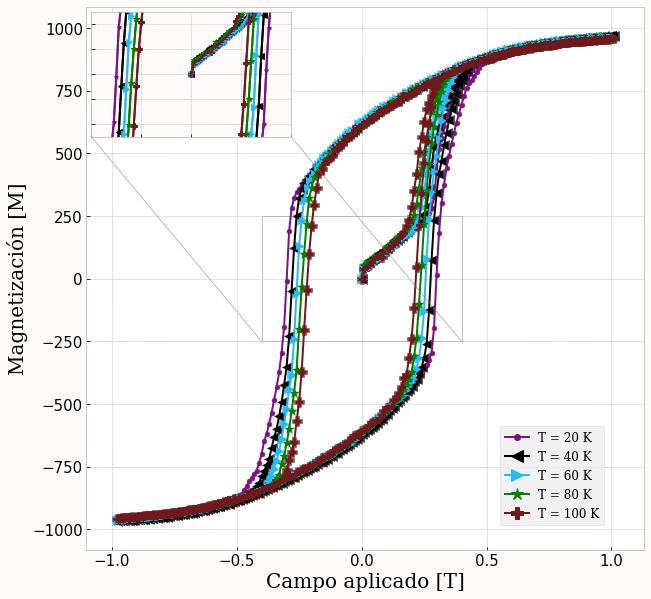

In [26]:
# PLOTTING HYSTERESIS LOOP
plt.style.use("bmh")
ax = dfH20.plot.scatter(x='x',y='y',alpha=0.8, figsize=(10,10), fontsize=12, color='#7B157D', marker='.', s=100)  
dfH40.plot.scatter(x='x',y='y',alpha=0.8, figsize=(10,10), fontsize=12, s=100, color='k', marker='<', ax=ax)
dfH60.plot.scatter(x='x',y='y',alpha=0.8, figsize=(10,10), fontsize=12, s=100, color='#26BBF1', marker='>', ax=ax)
dfH80.plot.scatter(x='x',y='y',alpha=0.8, figsize=(10,10), fontsize=12, s=100, color='g', marker='*', ax=ax)
dfH100.plot.scatter(x='x',y='y',alpha=0.8, figsize=(10,10), fontsize=12, s=100, color='#70191C', marker='P', ax=ax)

#ax.set_title('M(H) Curve', size="xx-large", family="serif", weight= "semibold")
plt.xlabel('Campo aplicado [T]', fontsize= 20, color="#000000", family="serif")
plt.ylabel('Magnetización [M]', fontsize= 20, color="#000000", family="serif")

plt.plot( 'x', 'y', data=dfH20, linestyle='-', marker='.', color='#7B157D', label="T = 20 K")
plt.plot( 'x', 'y', data=dfH40, linestyle='-', marker='<', color='k', label="T = 40 K")
plt.plot( 'x', 'y', data=dfH60, linestyle='-', marker='>', color='#26BBF1', label="T = 60 K")
plt.plot( 'x', 'y', data=dfH80, linestyle='-', marker='*', color='g', label="T = 80 K")
plt.plot( 'x', 'y', data=dfH100, linestyle='-', marker='P', color='#70191C', label="T = 100 K")
plt.xticks(np.arange(-1,1.1,0.5))
plt.yticks(np.arange(-1000,1000.1,250))

font = font_manager.FontProperties(family='serif',
                                   style='normal', size=12)
ax.legend(bbox_to_anchor=(0.95, 0.25), loc=0, borderaxespad=1, prop=font, markerscale=2)

#======================= ZOOM 1 ========================
axins = zoomed_inset_axes(ax, 1, loc=2)
axins.plot(dfH20['x'],dfH20['y'], linestyle='-', marker=".", c="#7B157D")
axins.plot(dfH40['x'],dfH40['y'], linestyle='-', marker="<", c="k")
axins.plot(dfH60['x'],dfH60['y'], linestyle='-', marker=">", c="#26BBF1")
axins.plot(dfH80['x'],dfH80['y'], linestyle='-', marker="*", c="g")
axins.plot(dfH100['x'],dfH100['y'], linestyle='-', marker="P", c="#70191C")
axins.set_xlim(-0.4, 0.4)
axins.set_ylim(-250, 250)
plt.yticks(visible=False)
plt.xticks(visible=False)
axins.set_facecolor('#FFFBFB')
mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.5")

plt.plot( 'x', 'y', data=dfH20, linestyle='-', marker='1', color='#7B157D')
plt.plot( 'x', 'y', data=dfH40, linestyle='-', marker='2', color='k')
plt.plot( 'x', 'y', data=dfH60, linestyle='-', marker='3', color='#26BBF1')
plt.plot( 'x', 'y', data=dfH80, linestyle='-', marker='4', color='g')
plt.plot( 'x', 'y', data=dfH100, linestyle='-', marker='4', color='#70191C')

ax.set_facecolor('#FFFFFF')
plt.gcf().set_facecolor('#FFFBFB')
ax.tick_params(labelsize=15)
plt.savefig('Hyst.svg', transparent=True)

#Plot
plt.show()

/home/vizi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  # This is added back by InteractiveShellApp.init_path()
/home/vizi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  if sys.path[0] == '':
/home/vizi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  del sys.path[0]
/home/vizi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as

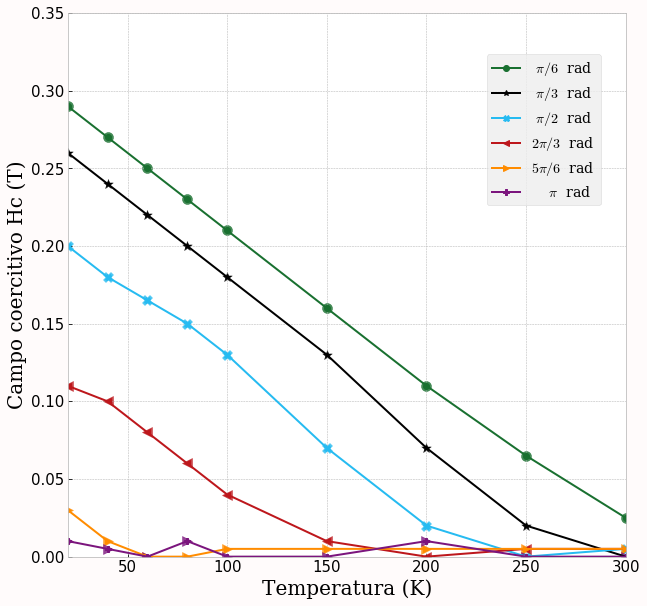

In [27]:
plt.style.use("bmh")
ax = df30.plot.scatter(x='x',y='y',alpha=0.8, figsize=(10,10), fontsize=12, color='#197030', s=100, marker='o')  
df60.plot.scatter(x='x',y='y',alpha=0.8, figsize=(10,10), fontsize=12, color='k', s=100, marker='*', ax=ax)  
df90.plot.scatter(x='x',y='y',alpha=0.8, figsize=(10,10), fontsize=12, color='#26BBF1', s=100, marker='X', ax=ax)  
df120.plot.scatter(x='x',y='y',alpha=0.8, figsize=(10,10), fontsize=12, color='#BD171C', s=100, marker='<', ax=ax)  
df150.plot.scatter(x='x',y='y',alpha=0.8, figsize=(10,10), fontsize=12, color='darkorange', s=100, marker='>', ax=ax)  
df180.plot.scatter(x='x',y='y',alpha=0.8, figsize=(10,10), fontsize=12, color='#7B157D', s=100, marker='>', ax=ax)  

#plt.xticks(np.arange(0,501,step=100))

plt.plot( 'x', 'y', data=df30, linestyle='-', marker='o', color='#197030', label= r' $\pi/6$  rad')
plt.plot( 'x', 'y', data=df60, linestyle='-', marker='*', color='k', label=  r' $\pi/3$  rad')
plt.plot( 'x', 'y', data=df90, linestyle='-', marker='X', color='#26BBF1', label=  r' $\pi/2$  rad')
plt.plot( 'x', 'y', data=df120, linestyle='-', marker='<', color='#BD171C', label=  r'$2\pi/3$  rad')
plt.plot( 'x', 'y', data=df150, linestyle='-', marker='>', color='darkorange', label=  r'$5\pi/6$  rad')
plt.plot( 'x', 'y', data=df180, linestyle='-', marker='P', color='#7B157D', label=  r'    $\pi$  rad')

font = font_manager.FontProperties(family='serif',
                                   style='normal', size=14)
legend = ax.legend(bbox_to_anchor=(0.98, 0.95), loc=0, borderaxespad=1, prop=font, markerscale=1)
legend._legend_box.align = "right"

plt.xlabel('Temperatura (K)', fontsize= 20, color="#000000", family="serif")
plt.ylabel('Campo coercitivo Hc (T)', fontsize= 20, color="#000000", family="serif")

ax.set_facecolor('#FFFFFF')
plt.gcf().set_facecolor('#FFFBFB')

axes = plt.gca()
axes.set_xlim([20,300])
axes.set_ylim([0,0.35])
ax.tick_params(labelsize=15)
plt.savefig('mcs.svg', transparent=True)

plt.show()